In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
category = {1: 'car', 2: 'truck', 3: 'pedestrian', 4: 'bicyclist', 5: 'light'}

In [18]:
data_val = pd.read_csv('/Users/rhira/Repo/Object_Detection/data/labels_trainval.csv')
data_val.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [19]:
data_val.dtypes

frame       object
xmin         int64
xmax         int64
ymin         int64
ymax         int64
class_id     int64
dtype: object

In [20]:
data_val["cx"] = data_val.apply(lambda val: (val['xmin'] + val['xmax'])/2 , axis=1)
data_val["cy"] = data_val.apply(lambda val: (val['ymin'] + val['ymax'])/2, axis=1)
data_val["w"] = data_val.apply(lambda val: val['xmax'] - val['xmin'], axis=1)
data_val["h"] = data_val.apply(lambda val: val['ymax'] + val['ymin'], axis=1)
data_val["name"] = data_val.class_id.map(lambda x: category[x])

In [21]:
data_val.dtypes

frame        object
xmin          int64
xmax          int64
ymin          int64
ymax          int64
class_id      int64
cx          float64
cy          float64
w             int64
h             int64
name         object
dtype: object

<AxesSubplot:>

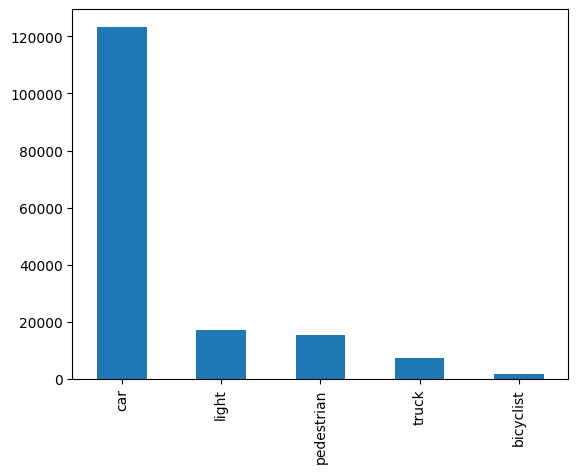

In [22]:
data_val.name.value_counts().plot(kind = 'bar')

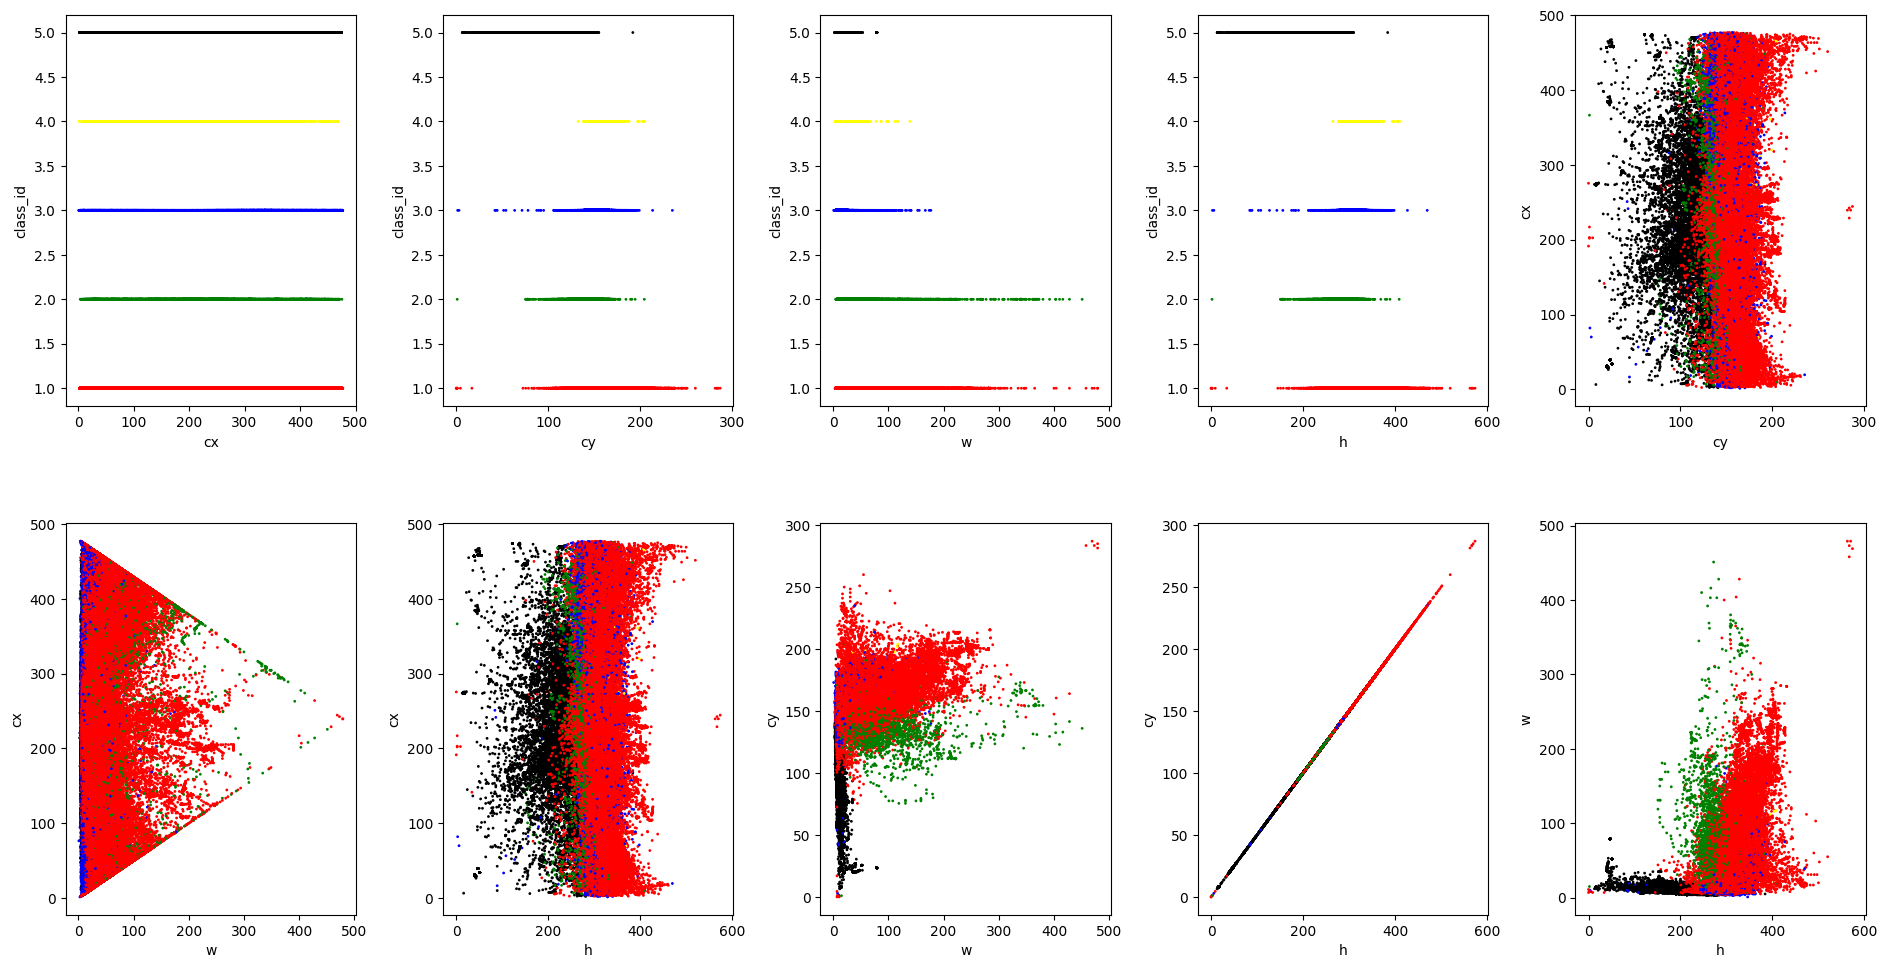

In [26]:
# for id  in range(1,6):
# data = data_val[data_val['class_id'] == id]
data = data_val
colors = {'car':'red', 'truck':'green', 'pedestrian':'blue', 'bicyclist':'yellow', 'light':'black'}
fig, ax = plt.subplots(2,5, figsize=(20, 10),)


def scat_plot(col_i, col_j, i, j):
    x1 = data[data_val.columns[col_j]]
    y1 = data[data_val.columns[col_i]]
    ax[i,j].scatter(x1, y1, c=data['name'].map(colors), s=1)
    #add axis labels to plot
    ax[i,j].set_ylabel(data_val.columns[col_i])
    ax[i,j].set_xlabel(data_val.columns[col_j])

scat_plot(5,6,0,0)
scat_plot(5,7,0,1)
scat_plot(5,8,0,2)
scat_plot(5,9,0,3)
scat_plot(6,7,0,4)
scat_plot(6,8,1,0)
scat_plot(6,9,1,1)
scat_plot(7,8,1,2)
scat_plot(7,9,1,3)
scat_plot(8,9,1,4)

# #display plot
# fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

In [18]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with -9).